# Computer Vision
# Bag of Visual Words(BoVW)
### Objects Dataset
#### Name: Muhammed Umer Nazir | CMS ID: 399874

### We start by importing all the dependencies

In [78]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import joblib
import os
import seaborn as sns
sns.set()

### Loading the Training Data 
The next step is to load the training data from PC's local memory. Since the data we have is available in different folders. Therefore, we have natural division in our dataset. We will import images from all the folders along with labels (Since there are 4 different categories, therefore, the train_labels will be from 1 till 4) and append them in two lists below.

In [52]:
train_data = []
train_labels = []

In [53]:
folder_path = "Downloads/Computer Vision/Assignment 1/Objects_Dataset_Images/train/accordion"

for img in os.listdir(folder_path):
    image = cv2.imread(os.path.join(folder_path, img))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Images have been converted to grayscale to keep things simple and reduce complexity.
    train_data.append(gray)
    train_labels.append(1)

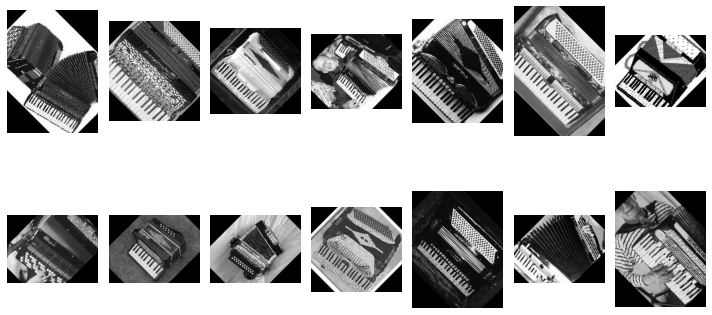

In [54]:
# In this step, we are visualizing the images that have been loaded. Since we only loaded the accordion images.
# Therefore,it will have 14 images in total.
rows = 2
cols = 7
fig, axs = plt.subplots(rows, cols, figsize=(10, 6))

axs = axs.ravel()
for i in range(len(train_data)):
    axs[i].imshow(cv2.cvtColor(train_data[i], cv2.COLOR_BGR2RGB))
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [55]:
folder_path = "Downloads/Computer Vision/Assignment 1/Objects_Dataset_Images/train/dollar_bill"

for img in os.listdir(folder_path):
    image = cv2.imread(os.path.join(folder_path, img))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    train_data.append(gray)
    train_labels.append(2)

In [56]:
print(len(train_data))
print(len(train_labels))

28
28


In [57]:
folder_path = "Downloads/Computer Vision/Assignment 1/Objects_Dataset_Images/train/motorbike"

for img in os.listdir(folder_path):
    image = cv2.imread(os.path.join(folder_path, img))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    train_data.append(gray)
    train_labels.append(3)

In [58]:
folder_path = "Downloads/Computer Vision/Assignment 1/Objects_Dataset_Images/train/Soccer_Ball"

for img in os.listdir(folder_path):
    image = cv2.imread(os.path.join(folder_path, img))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    train_data.append(gray)
    train_labels.append(4)

In [59]:
print(len(train_data))
print(len(train_labels))

56
56


As seen above, the lists train_data and train_labels now have lengths of 56 because all the training have been loaded along with their labels from 1 till 4.

In the next step, we will visualize the loaded dataset to get a feel of our dataset and images from different categories.

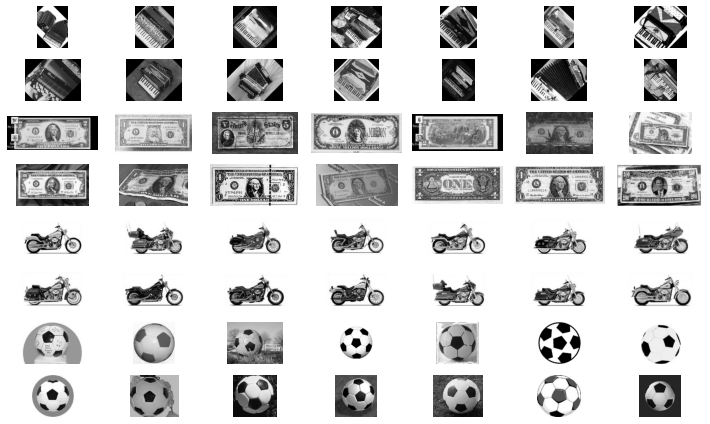

In [60]:
rows = 8
cols = 7
fig, axs = plt.subplots(rows, cols, figsize=(10, 6))

axs = axs.ravel()
for i in range(len(train_data)):
    axs[i].imshow(cv2.cvtColor(train_data[i], cv2.COLOR_BGR2RGB))
    axs[i].set_label(train_labels[i])
    axs[i].axis('off')

plt.tight_layout()
plt.show()

### Extracting features from the training images using SIFT.

In [61]:
sift = cv2.SIFT_create()
descriptors = []

for img in train_data:
    kp, des = sift.detectAndCompute(img, None)
    descriptors.append(des)
    
descriptors = np.vstack(descriptors)

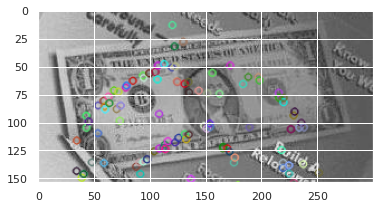

In [94]:
img_kp = cv2.drawKeypoints(train_data[24], kp, None)
plt.imshow(img_kp)
plt.show()

### Generating the Vocabulary, also known as Codewords

In [63]:
# Cluster the descriptors into 100 codewords using KMeans
kmeans = KMeans(n_clusters=100, random_state=0).fit(descriptors)

# Assign each descriptor to its closest codeword and generate histograms for each image
histograms = []

for img in train_data:
    kp, des = sift.detectAndCompute(img, None)
    words = kmeans.predict(des)
    histogram, _ = np.histogram(words, bins=100)
    histograms.append(histogram)


/home/umer/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [64]:
print(len(histograms))

56


### SVM Classifier Training

In [33]:
# In this step we are training an SVM classifier using the histograms and test_labels.
clf = SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(histograms, train_labels)

SVC(kernel='linear', random_state=0)

### Importing the Test Data

In [65]:
test_data = []
test_labels = []

folder_path = "Downloads/Computer Vision/Assignment 1/Objects_Dataset_Images/test/accordian"
for img in os.listdir(folder_path):
    image = cv2.imread(os.path.join(folder_path, img))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    test_data.append(gray)
    test_labels.append(1)

In [66]:
folder_path = "Downloads/Computer Vision/Assignment 1/Objects_Dataset_Images/test/dollar_bill"
for img in os.listdir(folder_path):
    image = cv2.imread(os.path.join(folder_path, img))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    test_data.append(gray)
    test_labels.append(2)

In [67]:
folder_path = "Downloads/Computer Vision/Assignment 1/Objects_Dataset_Images/test/motorbike"
for img in os.listdir(folder_path):
    image = cv2.imread(os.path.join(folder_path, img))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    test_data.append(gray)
    test_labels.append(3)

In [68]:
folder_path = "Downloads/Computer Vision/Assignment 1/Objects_Dataset_Images/test/Soccer_Ball"
for img in os.listdir(folder_path):
    image = cv2.imread(os.path.join(folder_path, img))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    test_data.append(gray)
    test_labels.append(4)

In [69]:
print(len(test_data))
print(len(test_labels))

8
8


In [34]:
joblib.dump(clf, 'cv_objects_svm_classifier.pkl')

['cv_objects_svm_classifier.pkl']

In [90]:
joblib.dump(test_labels, 'cv_objects_test_labels.pkl')

['cv_objects_test_labels.pkl']

In [71]:
# In this step, we will generate histograms for the test images
test_histograms = []

for img in test_data:
    kp, des = sift.detectAndCompute(img, None)
    words = kmeans.predict(des)
    histogram, _ = np.histogram(words, bins=100)
    test_histograms.append(histogram)

In [89]:
joblib.dump(test_histograms, 'cv_objects_test_histograms.pkl')

['cv_objects_test_histograms.pkl']

### Training the Random Forest Classifier

In [64]:
X = np.array(histograms)
y = np.array(train_labels)
clf_Rand_Forest = RandomForestClassifier(n_estimators=500)
clf_Rand_Forest.fit(X, y)

RandomForestClassifier(n_estimators=500)

In [65]:
joblib.dump(clf_Rand_Forest, 'cv_objects_Rand_Forest_classifier.pkl')

['cv_objects_Rand_Forest_classifier.pkl']

# Important Step
### Loading the required components using the Joblib Package

In [91]:
clf = joblib.load('cv_objects_svm_classifier.pkl')
clf_Rand_Forest = joblib.load('cv_objects_Rand_Forest_classifier.pkl')
test_histograms = joblib.load('cv_objects_test_histograms.pkl')
test_labels = joblib.load('cv_objects_test_labels.pkl')

## Testing the Performance of the SVM Classifier

In [72]:
# Here we will use the trained classifier to predict the labels of the test images
predictions = clf.predict(test_histograms)

# Now we will calculate the accuracy of the classifier
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy using the SVM Classifier: {accuracy}")

Accuracy using the SVM Classifier: 0.875


In [73]:
report = classification_report(test_labels, predictions)
print('Classification report for SVM Classifier:\n', report)

Classification report for SVM Classifier:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         2
           4       1.00      0.50      0.67         2

    accuracy                           0.88         8
   macro avg       0.92      0.88      0.87         8
weighted avg       0.92      0.88      0.87         8



Text(89.18, 0.5, 'Actual label')

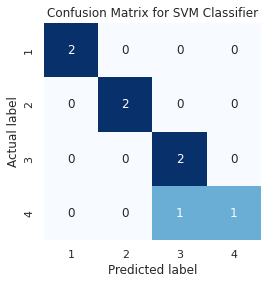

In [83]:
confusion_matrix_svm = confusion_matrix(test_labels, predictions)

sns.heatmap(confusion_matrix_svm, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=set(test_labels),
            yticklabels=set(test_labels))
plt.title("Confusion Matrix for SVM Classifier")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

## Testing the Performance of the Random Forest Classifier

In [85]:
predictions_Rand_Forrest = clf_Rand_Forest.predict(test_histograms)

accuracy = accuracy_score(test_labels, predictions_Rand_Forrest)
print(f"Accuracy using the Random Forest Classifier: {accuracy}")

Accuracy using the Random Forest Classifier: 1.0


In [86]:
report_Rand_Forest = classification_report(test_labels, predictions_Rand_Forrest)
print('Classification report for Random Forest Classifier:\n', report_Rand_Forest)

Classification report for Random Forest Classifier:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



Text(89.18, 0.5, 'Actual label')

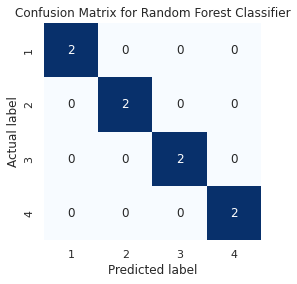

In [88]:
confusion_matrix_Rand_Forest = confusion_matrix(test_labels, predictions_Rand_Forrest)

sns.heatmap(confusion_matrix_Rand_Forest, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=set(test_labels),
            yticklabels=set(test_labels))
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')